In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
!wget 'https://raw.githubusercontent.com/albas99/Fourier-Transform/master/sample%20analysis.csv'

--2023-07-13 18:49:09--  https://raw.githubusercontent.com/albas99/Fourier-Transform/master/sample%20analysis.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17946 (18K) [text/plain]
Saving to: ‘sample analysis.csv’

sample analysis.csv 100%[===================>]  17.53K  --.-KB/s    in 0.001s  

2023-07-13 18:49:09 (13.2 MB/s) - ‘sample analysis.csv’ saved [17946/17946]



In [3]:
data = pd.read_csv('/kaggle/working/sample analysis.csv', sep = ',', index_col='Time,ms')
data

,3,5,6,6.1,6.2,15,17,17.1
"Time,ms",,,,,,,,
0.0,-2.351363,0.000013,-10.800000,1.150000e-06,0.000003,-3.100000,1.470000e-06,0.000005
0.5,-2.473562,0.000012,-11.100000,9.600000e-07,0.000003,-3.450000,1.310000e-06,0.000005
1.0,-2.625094,0.000012,-11.500000,7.460000e-07,0.000002,-3.830000,1.130000e-06,0.000004
1.5,-2.804676,0.000012,-11.900000,5.060000e-07,0.000002,-4.250000,9.300000e-07,0.000004
2.0,-3.010519,0.000012,-12.400000,2.440000e-07,0.000001,-4.700000,7.250000e-07,0.000004
...,...,...,...,...,...,...,...,...
98.0,-2.117023,-0.000012,24.090590,3.810000e-06,0.000004,-8.207112,-8.300000e-06,-0.000011
98.5,-2.444991,-0.000013,23.955892,4.010000e-06,0.000004,-8.046144,-7.690000e-06,-0.000011
99.0,-2.729824,-0.000014,23.885146,4.220000e-06,0.000004,-7.833394,-7.080000e-06,-0.000011


In [59]:
def plot_spectrogram(sig: str, nfft, noverlap, colormap):
    time_step = 0.0005 # in seconds
    sample_freq = 1 / time_step
    sig = np.array(data[sig])
    
    assert sig.ndim  == 1
    assert nfft <= len(sig)
    
    window = np.blackman(nfft)
    
    Sxx, freqs, bins, im = plt.specgram(sig, Fs = sample_freq, NFFT = nfft, noverlap = noverlap, cmap = colormap, window = window)
    plt.colorbar().set_label('Power')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.show()
    return Sxx

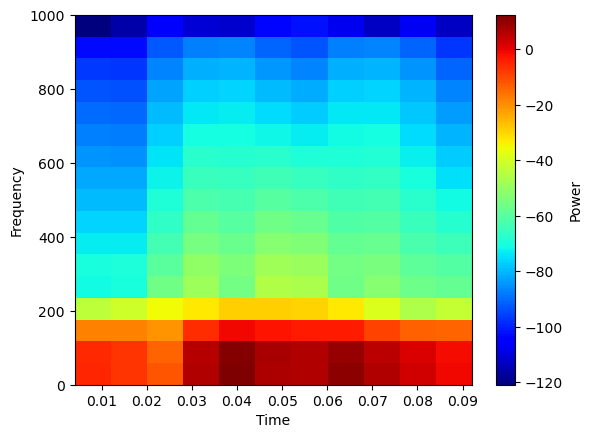

array([[3.11729419e-01, 1.96885056e-01, 6.16597436e-02, 4.24331555e+00,
        1.69120697e+01, 4.68322970e+00, 4.03545146e+00, 1.08537586e+01,
        4.34145723e+00, 1.88989116e+00, 8.09074141e-01],
       [2.62886255e-01, 1.81639808e-01, 4.03685094e-02, 3.73301395e+00,
        1.40877675e+01, 5.20905614e+00, 4.39007036e+00, 8.82804547e+00,
        3.27441079e+00, 1.41855902e+00, 6.96890050e-01],
       [1.53038672e-02, 1.49276389e-02, 8.84792111e-03, 2.49397967e-01,
        7.57576423e-01, 5.45894980e-01, 4.43047619e-01, 4.29133052e-01,
        1.12276526e-01, 4.51748496e-02, 4.15572143e-02],
       [4.39079368e-05, 8.16253549e-05, 2.79812258e-04, 5.63961769e-04,
        1.16946146e-03, 1.24153507e-03, 1.05244555e-03, 5.21385274e-04,
        1.25149905e-04, 2.43558447e-05, 5.39087256e-05],
       [7.49807552e-08, 9.71438038e-08, 2.59776554e-06, 1.27092892e-05,
        2.61054552e-06, 2.61592761e-05, 2.06884610e-05, 2.48718056e-06,
        5.54171435e-06, 2.09128039e-06, 1.45847946e-

In [60]:
plot_spectrogram('3', 32, 16, 'jet')

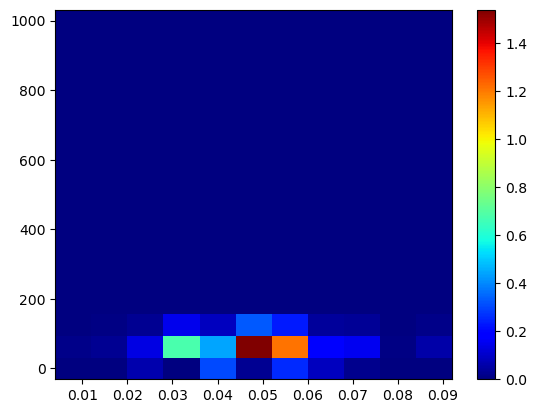

In [35]:
def compute_spectrogram(sig, nperseg, noverlap):
    time_step = 0.0005
    sample_freq = 1 / time_step
    sig = np.array(data[sig])
    freqs, times, Sxx = signal.spectrogram(sig, fs = sample_freq, nperseg = nperseg, noverlap = noverlap, window = 'blackman')
    
    return freqs, times, Sxx

freqs, times, Sxx = compute_spectrogram('3', nperseg = 32, noverlap = 16)

plt.pcolormesh(times, freqs, Sxx, cmap = 'jet')
plt.colorbar()